# Lateral Flow Image Analysis with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.model_selection as ms
import numpy.random as nr
import scipy.stats as ss
import math
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedKFold

import statsmodels.formula.api as smf
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [2]:
#df = pd.read_csv('CropImage_Data2.csv',index_col=0)
df = pd.read_csv("Concentration_Prediction_DataFrame.csv", index_col=0)

In [3]:
df.shape
#df.columns

(126, 12)

In [4]:
df.head(15)

,ImageName,ControlLine_mean,ControlLine_median,ControlLine_std,TestLine_mean,TestLine_median,TestLine_std,Ratio_of_CL_to_TL,Ratio_of_mean,Ratio_of_median,Ratio_of_std,Concentration
0,0-I DS_P_Dig_I ROI_1,13.354320,5.075174,3.967910,5.098702,5.010635,58.683770,0.819441,1.088693,1.066667,0.900997,0
1,0-II DS_P_Dig_II ROI_1,13.354718,5.081404,3.993391,5.093553,5.010635,59.334190,0.952009,1.094378,1.073333,0.914118,0
2,0-III DS_P_Dig_III ROI_1,12.927609,5.043425,4.040015,5.181346,5.129899,61.091396,0.025318,0.939305,0.917160,0.930199,0
3,1-I DS_P_Dig_I ROI_1,12.384722,4.955827,4.422614,5.068827,4.962845,60.969907,0.942043,0.964737,0.993007,1.366473,1
4,1-II DS_P_Dig_II ROI_1,13.254336,5.398163,4.515787,5.081956,4.983607,60.116412,1.047319,1.090562,1.513699,1.521207,1
5,1-III DS_P_Dig_III ROI_1,13.431964,5.105945,3.998167,5.092768,4.990433,59.602327,0.974560,1.107944,1.122449,0.914363,1
6,10-I DS_P_Dig_I ROI_1,13.373763,5.075174,3.944242,5.105924,5.003946,57.133464,0.676340,1.084008,1.073826,0.903799,10
7,10-II DS_P_Dig_II ROI_1,13.250997,5.049856,3.974829,5.098621,4.983607,57.288367,0.675755,1.071999,1.068493,0.929351,10
8,10-III DS_P_Dig_III ROI_1,13.427549,5.087596,3.955549,5.111835,5.017280,57.064720,0.824175,1.086305,1.072848,0.915178,10
9,100 nM DC_I_P_single_II ROI_1,12.668376,4.890349,4.071203,5.116489,5.236442,77.679783,0.354172,0.962451,0.707447,0.754733,100


In [5]:
X = df[['ControlLine_mean', 'ControlLine_median', 'ControlLine_std', 'TestLine_mean', 'TestLine_median', 'TestLine_std',
       'Ratio_of_CL_to_TL', 'Ratio_of_mean', 'Ratio_of_median', 'Ratio_of_std']]

y = df['Concentration']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=0)

lm = LinearRegression(fit_intercept=False)
lm.fit(X_train1,y_train1)

predictions = lm.predict(X_test1)

In [6]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    r2_adj_2 = 1 - (((1-r2) * (y_true.shape[0] - 1))/(y_true.shape[0] - n_parameters-1))

    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    #print('Adjusted R^2           = ' + str(r2_adj_2))

print_metrics(y_test1, predictions, 10)

Mean Square Error      = 393.1591620554047
Root Mean Square Error = 19.828241527059447
Mean Absolute Error    = 11.22426647428585
Median Absolute Error  = 6.5236964001851785
R^2                    = 0.6639020729831915
Adjusted R^2           = 0.5558705964420745


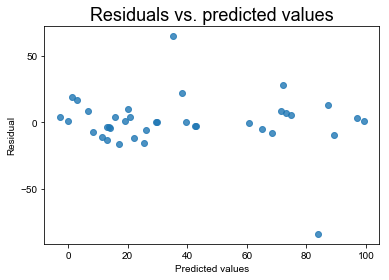

In [7]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    plt.figure()
    sns.regplot(y_score, resids, fit_reg=False)
    sns.set(font_scale=1.5)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test1, predictions) 

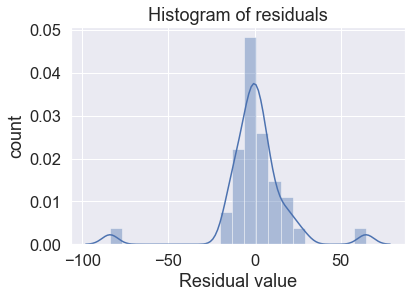

In [8]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    plt.figure()
    sns.distplot(resids)
    sns.set(font_scale=1.5)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test1, predictions) 

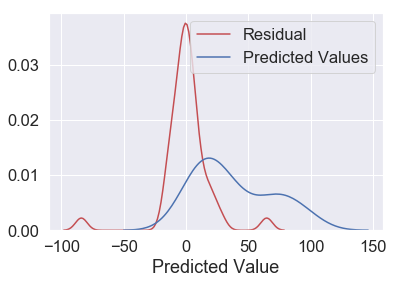

In [9]:
resids = np.subtract(y_test1, predictions)
G = list(zip(predictions.round(),resids))
DaF = pd.DataFrame(G, columns=['Predicted Value','Residual'])

ax1 = sns.distplot(DaF['Residual'], hist=False, color="r", label="Residual")
sns.distplot(DaF['Predicted Value'], hist=False, color="b", label="Predicted Values" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)
sns.set(font_scale=1.5)

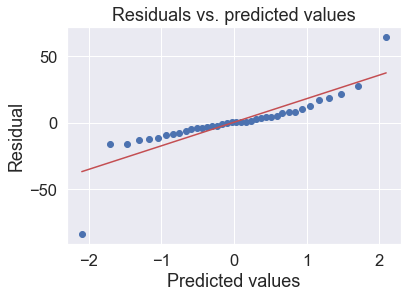

In [10]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
#    ss.probplot(resids.flatten(), plot = plt)
    plt.figure()
    ss.probplot(resids, plot = plt, rvalue=False)
    sns.set(font_scale=1.5)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test1, predictions) 

Text(0.5, 1.0, 'True Vs Predicted Value')

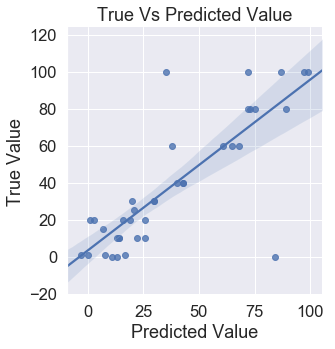

In [11]:
z = list(zip(predictions.round(),y_test1))
dff = pd.DataFrame(z, columns=['Predicted Value','True Value'])
#z = list(zip(predictions,y_pred,y_test2))
#dff = pd.DataFrame(z, columns=['Prediction','Ran_For_pred' ,'Y_test'])
#dff
sns.lmplot(x = 'Predicted Value',y='True Value',data=dff)
sns.set(font_scale=1.5)
plt.title("True Vs Predicted Value")

Text(0.5, 1.0, 'Actual vs Predicted Values')

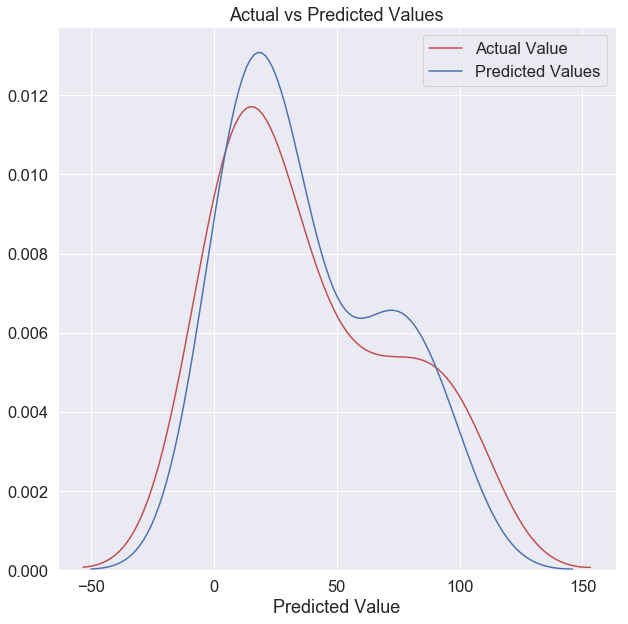

In [12]:
plt.figure(figsize=(10, 10))


ax1 = sns.distplot(dff['True Value'], hist=False, color="r", label="Actual Value")
sns.distplot(dff['Predicted Value'], hist=False, color="b", label="Predicted Values" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)
sns.set(font_scale=1.5)


plt.title('Actual vs Predicted Values')

In [13]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train1,y_train1)
y_pred = rf_reg.predict(X_test1)
#rsqure_score = rf_reg.score(X_train1,y_train1)
rsqure_score = sklm.r2_score(y_test1, y_pred)
print('R^2: {}'.format(rsqure_score))

R^2: 0.5842488793219809


C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
'''img_name= list()
ControlLine_mean = list()
ControlLine_median = list()
ControlLine_std = list()
TestLine_mean = list()
TestLine_median = list()
TestLine_std = list()
Ratio_of_CL_to_TL = list()
Ratio_of_mean = list() 
Ratio_of_median = list()
Ratio_of_std = list()
Concentration = list()'''

'img_name= list()\nControlLine_mean = list()\nControlLine_median = list()\nControlLine_std = list()\nTestLine_mean = list()\nTestLine_median = list()\nTestLine_std = list()\nRatio_of_CL_to_TL = list()\nRatio_of_mean = list() \nRatio_of_median = list()\nRatio_of_std = list()\nConcentration = list()'

In [15]:
#df['Concentration'].unique()

In [16]:
#df_new = df[df['Concentration'] == 50]
#df_new

In [17]:
#df_new_1 = df_new.loc[88:90]
#df_new_1

In [18]:
#img_name.append(df_new_1.ImageName.loc[88])
#img_name.append('60nM DC_I_P_single_V ROI_1')
#img_name.append(df_new_1[0])

In [19]:
'''ControlLine_mean.append((df_new_1.mean(axis=0))[0])
ControlLine_median.append((df_new_1.mean(axis=0))[1])
ControlLine_std.append((df_new_1.mean(axis=0))[2])
TestLine_mean.append((df_new_1.mean(axis=0))[3])
TestLine_median.append((df_new_1.mean(axis=0))[4])
TestLine_std.append((df_new_1.mean(axis=0))[5])
Ratio_of_CL_to_TL.append((df_new_1.mean(axis=0))[6])
Ratio_of_mean.append((df_new_1.mean(axis=0))[7])
Ratio_of_median.append((df_new_1.mean(axis=0))[8])
Ratio_of_std.append((df_new_1.mean(axis=0))[9])
Concentration.append((df_new_1.mean(axis=0))[10])'''

'ControlLine_mean.append((df_new_1.mean(axis=0))[0])\nControlLine_median.append((df_new_1.mean(axis=0))[1])\nControlLine_std.append((df_new_1.mean(axis=0))[2])\nTestLine_mean.append((df_new_1.mean(axis=0))[3])\nTestLine_median.append((df_new_1.mean(axis=0))[4])\nTestLine_std.append((df_new_1.mean(axis=0))[5])\nRatio_of_CL_to_TL.append((df_new_1.mean(axis=0))[6])\nRatio_of_mean.append((df_new_1.mean(axis=0))[7])\nRatio_of_median.append((df_new_1.mean(axis=0))[8])\nRatio_of_std.append((df_new_1.mean(axis=0))[9])\nConcentration.append((df_new_1.mean(axis=0))[10])'

In [20]:
'''ControlLine_mean.append((df_new_1)[1])
ControlLine_median.append((df_new_1)[2])
ControlLine_std.append((df_new_1)[3])
TestLine_mean.append((df_new_1)[4])
TestLine_median.append((df_new_1)[5])
TestLine_std.append((df_new_1)[6])
Ratio_of_CL_to_TL.append((df_new_1)[7])
Ratio_of_mean.append((df_new_1)[8])
Ratio_of_median.append((df_new_1)[9])
Ratio_of_std.append((df_new_1)[10])
Concentration.append((df_new_1)[11])
'''

'ControlLine_mean.append((df_new_1)[1])\nControlLine_median.append((df_new_1)[2])\nControlLine_std.append((df_new_1)[3])\nTestLine_mean.append((df_new_1)[4])\nTestLine_median.append((df_new_1)[5])\nTestLine_std.append((df_new_1)[6])\nRatio_of_CL_to_TL.append((df_new_1)[7])\nRatio_of_mean.append((df_new_1)[8])\nRatio_of_median.append((df_new_1)[9])\nRatio_of_std.append((df_new_1)[10])\nConcentration.append((df_new_1)[11])\n'

In [21]:
'''print(img_name,'\n',ControlLine_mean,'\n',ControlLine_median,'\n',ControlLine_std,'\n',
      TestLine_mean,'\n',TestLine_median,'\n',TestLine_std, '\n',Ratio_of_CL_to_TL,'\n',Ratio_of_mean,
     '\n',Ratio_of_median,'\n',Ratio_of_std, '\n',Concentration)'''

"print(img_name,'\n',ControlLine_mean,'\n',ControlLine_median,'\n',ControlLine_std,'\n',\n      TestLine_mean,'\n',TestLine_median,'\n',TestLine_std, '\n',Ratio_of_CL_to_TL,'\n',Ratio_of_mean,\n     '\n',Ratio_of_median,'\n',Ratio_of_std, '\n',Concentration)"

In [22]:
'''
zippedList = list(zip(img_name, ControlLine_mean, ControlLine_median, ControlLine_std, TestLine_mean, 
                      TestLine_median, TestLine_std,Ratio_of_CL_to_TL, Ratio_of_mean, Ratio_of_median, 
                      Ratio_of_std, Concentration))

df2 = pd.DataFrame(zippedList, columns = ['img_name', 'ControlLine_mean', 'ControlLine_median', 'ControlLine_std', 
                                          'TestLine_mean', 'TestLine_median', 'TestLine_std', 
                                          'Ratio_of_CL_to_TL', 'Ratio_of_mean', 'Ratio_of_median',
                                          'Ratio_of_std', 'Concentration'])
                                          '''

"\nzippedList = list(zip(img_name, ControlLine_mean, ControlLine_median, ControlLine_std, TestLine_mean, \n                      TestLine_median, TestLine_std,Ratio_of_CL_to_TL, Ratio_of_mean, Ratio_of_median, \n                      Ratio_of_std, Concentration))\n\ndf2 = pd.DataFrame(zippedList, columns = ['img_name', 'ControlLine_mean', 'ControlLine_median', 'ControlLine_std', \n                                          'TestLine_mean', 'TestLine_median', 'TestLine_std', \n                                          'Ratio_of_CL_to_TL', 'Ratio_of_mean', 'Ratio_of_median',\n                                          'Ratio_of_std', 'Concentration'])\n                                          "

In [23]:
#df2.to_csv('Concentration_Prediction_DataFrame_Merged.csv')
df2 = pd.read_csv('Concentration_Prediction_DataFrame_Merged.csv', index_col=0)

In [24]:
#df2.columns = ['Name', 'Control Line Mean', 'Control Line Median','Control Line std', 'Test Line Mean','Test Line Median',
 #            'Test Line std','Ratio', 'Concentration']
#df2.columns = ['Image','ControlLine_mean', 'ControlLine_median', 'ControlLine_std', 'TestLine_mean','TestLine_median', 'TestLine_std', 'Ratio_of_CL_to_TL','Concentration']
df2 =np.round(df2,3)
df2.head()
#df2.to_csv('Data Frame.csv')
#df2.shape

,img_name,ControlLine_mean,ControlLine_median,ControlLine_std,TestLine_mean,TestLine_median,TestLine_std,Ratio_of_CL_to_TL,Ratio_of_mean,Ratio_of_median,Ratio_of_std,Concentration
0,0-I DS_P_Dig_I ROI_1,13.212,5.067,4.000,5.125,5.050,59.703,0.599,1.041,1.019,0.915,0.0
1,Serum 0 nmol_Dig_I DS_I_DigS_I ROI_1,12.005,4.710,4.224,4.865,4.637,76.535,0.906,1.112,1.077,0.892,0.0
2,1-I DS_P_Dig_I ROI_1,13.024,5.153,4.312,5.081,4.979,60.230,0.988,1.054,1.210,1.267,1.0
3,Dig 1 nM DC_I_DoS_I ROI_1,12.725,4.983,4.200,4.942,4.774,71.764,1.561,1.156,1.233,0.934,1.0
4,Dig 1nM DC_I_DoS_V ROI_1,11.910,4.820,4.408,4.851,4.615,77.932,1.954,1.109,1.228,1.053,1.0


In [25]:
'''lmod = smf.ols(formula=
    'concentration ~ ControlLine_mean + ControlLine_median + ControlLine_std + TestLine_mean + TestLine_median + TestLine_std + Ratio_of_CL_to_TL',
               data=df2).fit()
lmod.summary()
'''

"lmod = smf.ols(formula=\n    'concentration ~ ControlLine_mean + ControlLine_median + ControlLine_std + TestLine_mean + TestLine_median + TestLine_std + Ratio_of_CL_to_TL',\n               data=df2).fit()\nlmod.summary()\n"

In [26]:
#P = df2[['ControlLine_mean', 'ControlLine_median', 'ControlLine_std', 'TestLine_mean','TestLine_median', 'TestLine_std', 'Ratio_of_CL_to_TL']]
#X = np.array(X) 
#q = df2['concentration']
#y = np.array(y)
##########################################################################################################################

P = df2[['ControlLine_mean', 'ControlLine_median', 'ControlLine_std', 'TestLine_mean', 'TestLine_median', 'TestLine_std',
       'Ratio_of_CL_to_TL', 'Ratio_of_mean', 'Ratio_of_median', 'Ratio_of_std']]



q = df2['Concentration']

In [27]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
  color: black !important;
}
</style>

In [28]:
'''
for x in X.columns:
    f, [ax1,ax2,ax3] = plt.subplots(1,3)
    sns.distplot(df[x],ax=ax1)
    sns.distplot(np.sqrt(df[x]), ax=ax2)
    sns.distplot(np.log(df[x]), ax=ax3)
    plt.title(x)
'''

'\nfor x in X.columns:\n    f, [ax1,ax2,ax3] = plt.subplots(1,3)\n    sns.distplot(df[x],ax=ax1)\n    sns.distplot(np.sqrt(df[x]), ax=ax2)\n    sns.distplot(np.log(df[x]), ax=ax3)\n    plt.title(x)\n'

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(P, q, test_size=0.30, random_state=0)

In [30]:
lm = LinearRegression(fit_intercept=False)

In [31]:
lm.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [32]:
lm.score(X_test2, y_test2)

0.9303017057291137

In [33]:
print(lm.intercept_)
print(lm.coef_)

0.0
[-124.338061   -321.24360953 -646.55740125  752.29431741  172.22644261
    7.36322769   10.55618786 -130.81843217  473.22171186  391.59434663]


In [34]:
predictions2 = lm.predict(X_test2)

# Random Forest Regressor

# Ploting Prediction vs Y Test

Text(0.5, 1.0, 'Actual vs Predicted value')

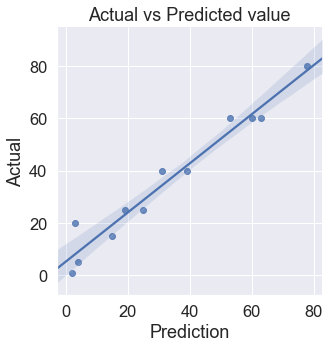

In [35]:
z = list(zip(predictions2.round(),y_test2))
dff2 = pd.DataFrame(z, columns=['Prediction','Actual'])
#z = list(zip(predictions,y_pred,y_test2))
#dff = pd.DataFrame(z, columns=['Prediction','Ran_For_pred' ,'Y_test'])
sns.set(font_scale=1.5)
sns.lmplot(x = 'Prediction',y='Actual',data=dff2)
plt.title("Actual vs Predicted value")

# Prediction vs Y Test

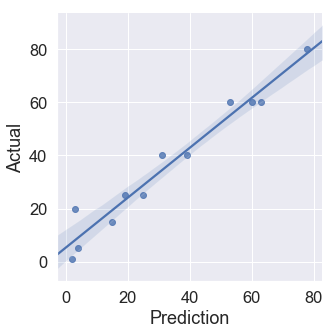

In [36]:
sns.set(font_scale=1.5)
sns.lmplot(x = 'Prediction',y='Actual',data=dff2)

# Y Test Vs Randon Forest Regressor

In [37]:
#sns.lmplot(x = 'Ran_For_pred',y='Y_test',data=dff)

Confidence Interval --- Remember this 

Text(0.5, 1.0, 'Actual vs Predicted Values')

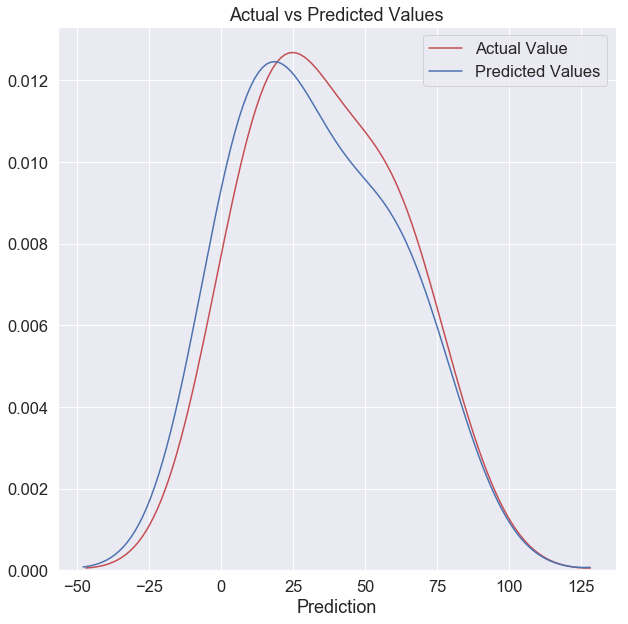

In [38]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=1.5)
ax1 = sns.distplot(dff2['Actual'], hist=False, color="r", label="Actual Value")
sns.distplot(dff2['Prediction'], hist=False, color="b", label="Predicted Values" , ax=ax1)

#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values')

##### Computing R-Square

In [39]:
sklm.r2_score(y_test2,predictions2)

0.9303017057291137

In [40]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    SSE = sum((y_true-y_predicted)**2)
    y_mean = np.mean(y_true)
    SST = np.sum((y_true - y_mean)**2)
    SSR = np.sum((y_predicted-y_mean)**2)
    r_square = 1-(SSE/SST)
    #F_value = (r2/(1-r2))*((y_true.shape[0] - n_parameters-1)/n_parameters)
    AIC = y_true.shape[0]*(np.log(SSE/y_true.shape[0])+ ((2*n_parameters)/y_true.shape[0]))
    BIC = y_true.shape[0]*(np.log(SSE/y_true.shape[0])+ ((n_parameters*np.log(y_true.shape[0]))/y_true.shape[0]))

    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('SSE                    = ' + str(SSE))
    print('SST                    = ' + str(SST))
    print('SSR                    = ' + str(SSR))
    print('r_square               = ' + str(r_square))
    print('AIC                    = ' + str(AIC))
    print('BIC                    = ' + str(BIC))

y_score = lm.predict(X_test2) 
print_metrics(y_test2, predictions2, 10)

Mean Square Error      = 39.61718808587715
Root Mean Square Error = 6.294218623933963
Mean Absolute Error    = 3.937694738088434
Median Absolute Error  = 1.32739066012374
R^2                    = 0.9303017057291137
Adjusted R^2           = 0.6166593815101256
SSE                    = 475.40625703052586
SST                    = 6820.916666666667
SSR                    = 7550.450253277143
r_square               = 0.9303017057291137
AIC                    = 64.15115679996633
BIC                    = 69.00022329784633


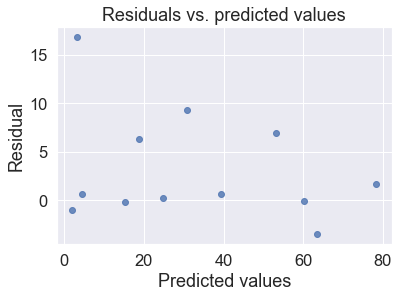

In [41]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    #plt.figure(figsize=(10,10))
    sns.regplot(y_score, resids, fit_reg=False)
    sns.set(font_scale=1.5)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    #plt.hlines(0,0,80)

resid_plot(y_test2, predictions2) 

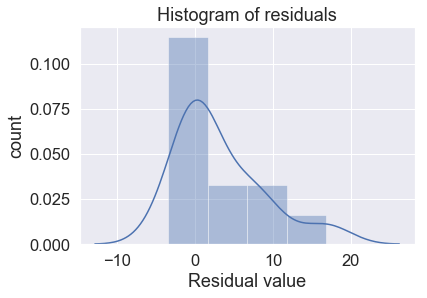

In [42]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    #plt.figure(figsize=(10,10))
    sns.distplot(resids)
    sns.set(font_scale=1.5)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test2, predictions2) 

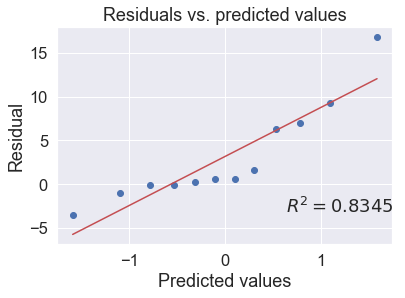

In [43]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
#    ss.probplot(resids.flatten(), plot = plt)
    #plt.figure(figsize=(10,10))
    ss.probplot(resids, plot = plt, rvalue=True)
    sns.set(font_scale=1.5)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test2, predictions2) 

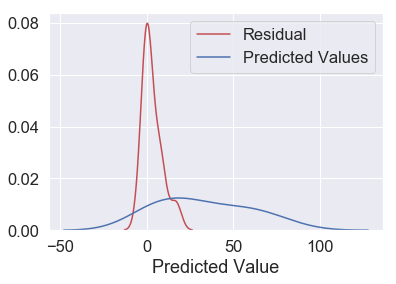

In [44]:
resids = np.subtract(y_test2, predictions2)
G = list(zip(predictions2.round(),resids))
DaF = pd.DataFrame(G, columns=['Predicted Value','Residual'])

ax1 = sns.distplot(DaF['Residual'], hist=False, color="r", label="Residual")
sns.distplot(DaF['Predicted Value'], hist=False, color="b", label="Predicted Values" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)
sns.set(font_scale=1.5)

In [132]:
colums=df2[['ControlLine_median', 'ControlLine_std', 'TestLine_median', 'TestLine_std',
       'Ratio_of_CL_to_TL' ]]
adj_r2 = list()
r_square = list()
n_parameters =7
q = df2['Concentration']


for col in colums:
    P = df2[['Ratio_of_mean','Ratio_of_std','Ratio_of_median','ControlLine_mean','TestLine_mean',col]]
    X_train2, X_test2, y_train2, y_test2 = train_test_split(P, q, test_size=0.30, random_state=0)
    lm = LinearRegression()
    lm.fit(X_train2,y_train2)
    predictions = lm.predict(X_test2)
    r2 = sklm.r2_score(y_test2, predictions)
    r2_adj = r2 - (n_parameters - 1)/(y_train2.shape[0] - n_parameters) * (1 - r2)
    adj_r2.append(r2_adj)
    r_square.append(r2)

print("Adjusted R^2")
print(adj_r2)
print()
print("R^2")
print(r_square)

Adjusted R^2
[0.869996900853609, 0.717057739207012, 0.7752922482450432, 0.7548059093730991, 0.7520335470747764]

R^2
[0.9024976756402068, 0.787793304405259, 0.8314691861837824, 0.8161044320298243, 0.8140251603060823]


In [133]:
np.arange(0,10,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ,
       5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6,
       7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6, 9.8])

Text(0, 0.5, 'Adjusted R Square')

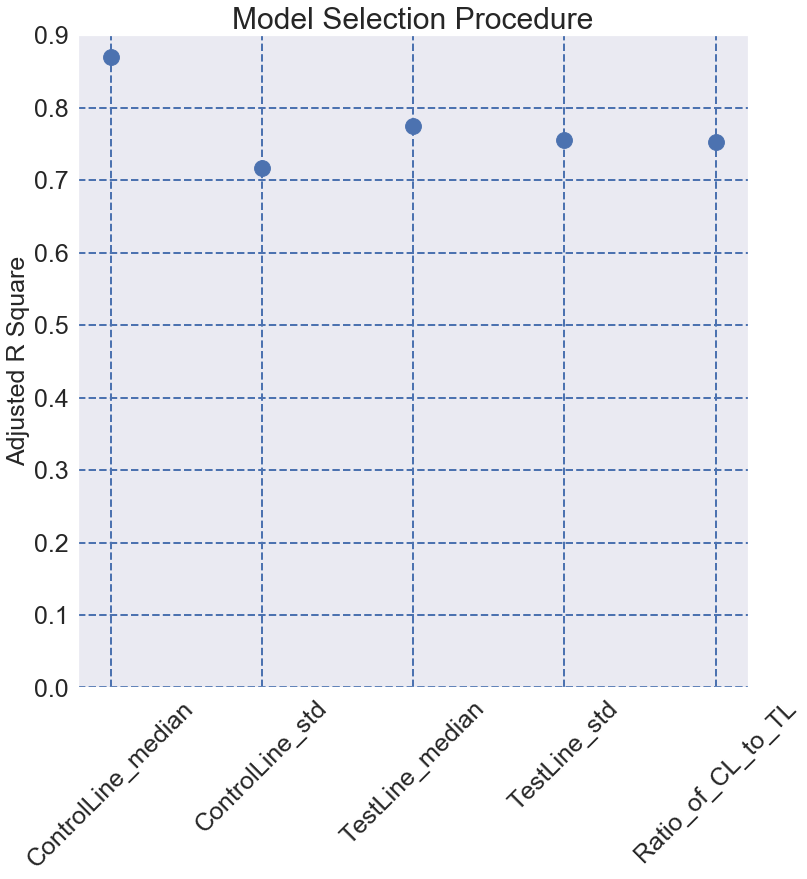

In [134]:
cols = [ col]
plt.figure(figsize=(12,12))
plt.scatter(range(len(adj_r2)), adj_r2,s=250)
plt.grid(color='b',linestyle='--', linewidth=2)
plt.xticks(range(len(adj_r2)), colums, size='small',fontsize=25)
plt.yticks(np.arange(0,1,0.1),size='small',fontsize=25)
plt.xticks(rotation=45)
plt.title('Model Selection Procedure',fontsize=30)
plt.ylabel('Adjusted R Square', fontsize=25)
#plt.xlabel('Features',fontsize=12)

In [144]:
#P = df2[['Ratio_of_mean','Ratio_of_std','Ratio_of_median','ControlLine_mean','TestLine_mean','ControlLine_median','TestLine_median']]
P = df2[['Ratio_of_mean','Ratio_of_std','Ratio_of_median','ControlLine_mean','TestLine_mean','ControlLine_median']]
#P = df2[['ControlLine_median', 'ControlLine_std', 'TestLine_mean','Ratio_of_CL_to_TL']]
#X = np.array(X) 
q = df2['Concentration']
#y = np.array(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(P, q, test_size=0.30, random_state=0)
lm = LinearRegression(fit_intercept=False)
lm.fit(X_train2,y_train2)
predictions3 = lm.predict(X_test2)

In [145]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    SSE = sum((y_true-y_predicted)**2)
    y_mean = np.mean(y_true)
    SST = np.sum((y_true - y_mean)**2)
    SSR = np.sum((y_predicted-y_mean)**2)
    r_square = 1-(SSE/SST)
    #F_value = (r2/(1-r2))*((y_true.shape[0] - n_parameters-1)/n_parameters)
    AIC = y_true.shape[0]*(np.log(SSE/y_true.shape[0])+ ((2*n_parameters)/y_true.shape[0]))
    BIC = y_true.shape[0]*(np.log(SSE/y_true.shape[0])+ ((n_parameters*np.log(y_true.shape[0]))/y_true.shape[0]))

    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    print('SSE                    = ' + str(SSE))
    print('SST                    = ' + str(SST))
    print('SSR                    = ' + str(SSR))
    print('r_square               = ' + str(r_square))
    print('AIC                    = ' + str(AIC))
    print('BIC                    = ' + str(BIC))

y_score = lm.predict(X_test2) 
print_metrics(y_test2, predictions3, 5)

Mean Square Error      = 67.99532461516718
Root Mean Square Error = 8.245927759516643
Mean Absolute Error    = 5.535308923280041
Median Absolute Error  = 4.049603794129212
R^2                    = 0.8803762111081835
Adjusted R^2           = 0.8120197603128598
SSE                    = 815.9438953820061
SST                    = 6820.916666666667
SSR                    = 7257.408196990706
r_square               = 0.8803762111081835
AIC                    = 60.63326736583626
BIC                    = 63.05780061477626


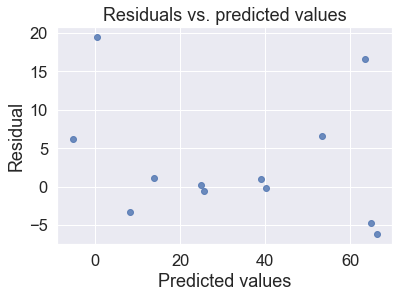

In [146]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    #plt.figure(figsize=(10,10))
    sns.regplot(y_score, resids, fit_reg=False)
    sns.set(font_scale=1.5)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test2, predictions3) 

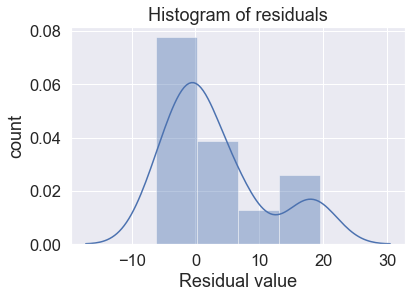

In [147]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    #plt.figure(figsize=(10,10))
    sns.distplot(resids)
    sns.set(font_scale=1.5)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test2, predictions3) 

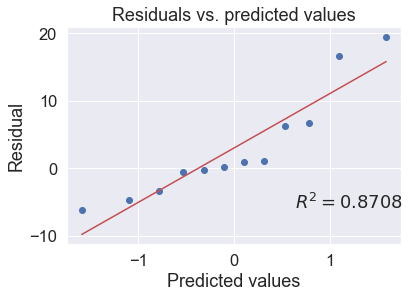

In [148]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    #ss.probplot(resids.flatten(), plot = plt)
    #plt.figure(figsize=(10,10))
    ss.probplot(resids, plot=plt, rvalue=True)
    sns.set(font_scale=1.5)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test2, predictions3) 

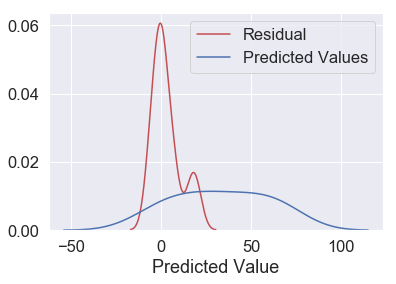

In [149]:
resids = np.subtract(y_test2, predictions3)
G = list(zip(predictions3.round(),resids))
DaF = pd.DataFrame(G, columns=['Predicted Value','Residual'])

ax1 = sns.distplot(DaF['Residual'], hist=False, color="r", label="Residual")
sns.distplot(DaF['Predicted Value'], hist=False, color="b", label="Predicted Values" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)
sns.set(font_scale=1.5)

<Figure size 720x720 with 0 Axes>

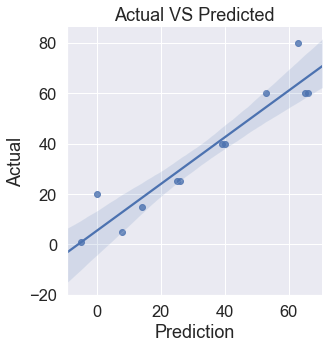

In [150]:
z = list(zip(predictions3.round(),y_test2))
dff = pd.DataFrame(z, columns=['Prediction','Actual'])
#z = list(zip(predictions,y_pred,y_test2))
#dff = pd.DataFrame(z, columns=['Prediction','Ran_For_pred' ,'Y_test'])
#dff
plt.figure(figsize=(10,10))
sns.lmplot(x = 'Prediction',y='Actual',data=dff)
plt.title("Actual VS Predicted")
sns.set(font_scale=1.5)

In [151]:
#resids = np.subtract(y_test2, predictions3)
#z = list(zip(predictions3.round(),y_test2, resids))
#dff = pd.DataFrame(z, columns=['Prediction','Actual', 'Residuals'])
#dff

Text(0.5, 1.0, 'Actual vs Predicted Values')

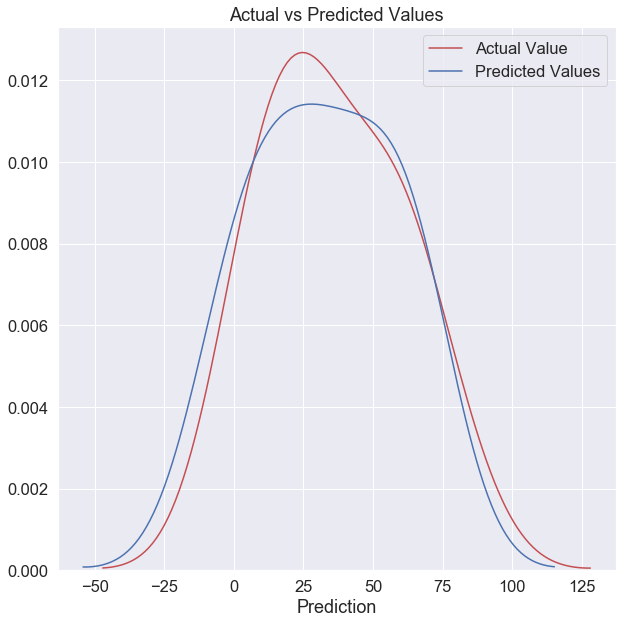

In [152]:
plt.figure(figsize=(10, 10))


ax1 = sns.distplot(dff['Actual'], hist=False, color="r", label="Actual Value")
sns.distplot(dff['Prediction'], hist=False, color="b", label="Predicted Values" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)
sns.set(font_scale=1.5)


plt.title('Actual vs Predicted Values')

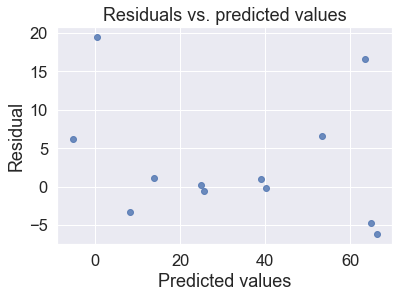

In [153]:
resid_plot(y_test2, y_score) 

# K-Fold Cross Validation

In [154]:
lin_model_cv = cross_val_score(lm,X,y,cv=5)
print(lin_model_cv)

[ 0.42897283 -1.42772475  0.84205794  0.83165955  0.92619526]


### Final Score

In [155]:
print("RSquare: %0.2f (+/- %0.2f)" % (lin_model_cv.mean(), lin_model_cv.std() * 2))

RSquare: 0.32 (+/- 1.78)


64% accuracy by using K-Fold Cross-Validation.

### Shuffle Split K-Fold Cross-Validation

In [156]:
lm_shuffle_split = ShuffleSplit(n_splits=5,test_size=0.3)
lm_shuffle_split_cv = cross_val_score(lm, X, y, cv=lm_shuffle_split)
print(lm_shuffle_split_cv)

[0.72124563 0.78742125 0.58235218 0.80866899 0.53761443]


In [157]:
print("RSquare: %0.2f (+/- %0.2f)" % (lm_shuffle_split_cv.mean(), lm_shuffle_split_cv.std() * 2))

RSquare: 0.69 (+/- 0.22)


## Validation for finding Best Model and HyperParameters

### K-Fold Cross-Validation with Grid Search

In [158]:
df22 = pd.read_csv('Concentration_Prediction_DataFrame_Merged.csv', index_col=0)

R = df22[['ControlLine_mean', 'ControlLine_median', 'ControlLine_std', 'TestLine_mean', 'TestLine_median', 'TestLine_std',
       'Ratio_of_CL_to_TL', 'Ratio_of_mean', 'Ratio_of_median', 'Ratio_of_std']]


K = df22['Concentration']
#X_train3, X_test3, y_train3, y_test3 = train_test_split(R, K, test_size=0.30, random_state=0)

In [182]:
R = df2[['Ratio_of_mean','Ratio_of_std','Ratio_of_median','ControlLine_mean','TestLine_mean']] 
K = df2['Concentration']
X_train3, X_test3, y_train3, y_test3 = train_test_split(R, K, test_size=0.30, random_state=0)
#lm = LinearRegression(fit_intercept=False)
#lm.fit(X_train2,y_train2)
#predictions3 = lm.predict(X_test2)

In [183]:
params_RF = {"max_depth": [3,5,6,7,8,9],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3,5,7],
              "min_samples_leaf": [1, 3,5,6]}

In [184]:
model_RF_GS = GridSearchCV(RandomForestRegressor(), param_grid=params_RF,cv=4)
model_RF_GS.fit(R,K)

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 6, 7, 8, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 5, 7], 'min_samples_leaf': [1, 3, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [185]:
print(model_RF_GS.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [186]:
pred_rf_grid = model_RF_GS.predict(R)

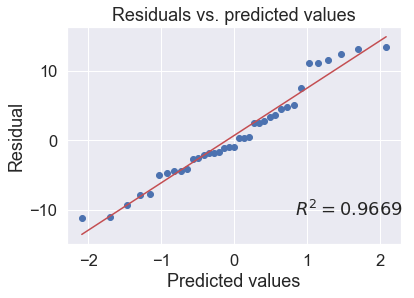

In [187]:
resid_qq(K,pred_rf_grid)

In [188]:
print_metrics(K, pred_rf_grid, 4)

Mean Square Error      = 44.202706067291786
Root Mean Square Error = 6.648511567809128
Mean Absolute Error    = 5.282136422136423
Median Absolute Error  = 4.38333333333334
R^2                    = 0.9313829602312701
Adjusted R^2           = 0.9251450475250219
SSE                    = 1635.500124489796
SST                    = 23835.189189189186
SSR                    = 19071.956829766503
r_square               = 0.9313829602312701
AIC                    = 148.18508238670483
BIC                    = 154.62875403728174


##### Computing R-Square

In [189]:
sklm.r2_score(K,pred_rf_grid)

0.9313829602312701

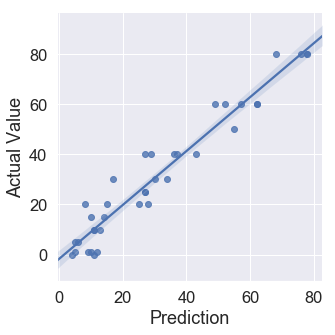

In [190]:
z = list(zip(pred_rf_grid.round(),K))
dff = pd.DataFrame(z, columns=['Prediction','Actual Value'])
#z = list(zip(predictions,y_pred,y_test2))
#dff = pd.DataFrame(z, columns=['Prediction','Ran_For_pred' ,'Y_test'])
#dff
sns.lmplot(x = 'Prediction',y='Actual Value',data=dff)

Text(0.5, 1.0, 'Actual vs Predicted Values')

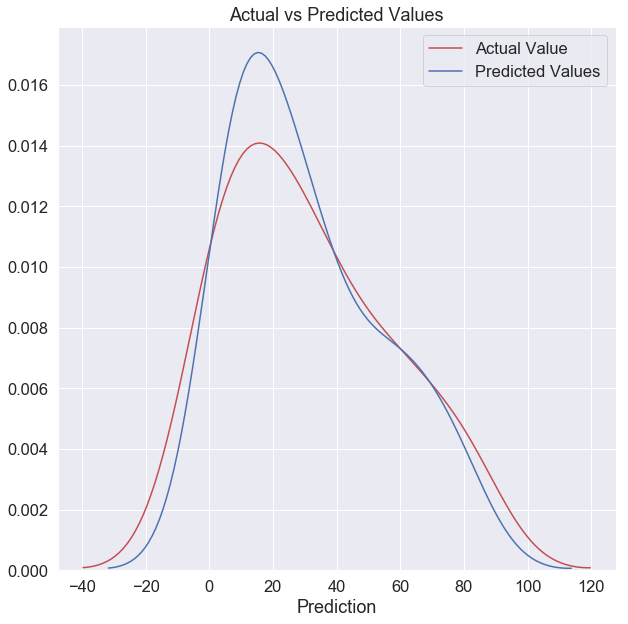

In [191]:
plt.figure(figsize=(10, 10))


ax1 = sns.distplot(dff['Actual Value'], hist=False, color="r", label="Actual Value")
sns.distplot(dff['Prediction'], hist=False, color="b", label="Predicted Values" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values')

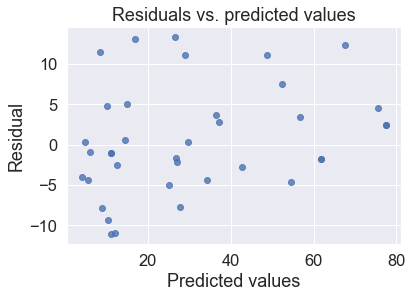

In [192]:
resid_plot(K, pred_rf_grid) 

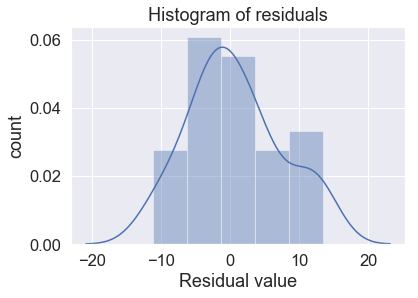

In [193]:
hist_resids(K, pred_rf_grid) 

### K-Fold and Holdout Cross-Validation

In [172]:
df22 = pd.read_csv('Concentration_Prediction_DataFrame_Merged.csv', index_col=0)

R = df22[['ControlLine_mean', 'ControlLine_median', 'ControlLine_std', 'TestLine_mean', 'TestLine_median', 'TestLine_std',
       'Ratio_of_CL_to_TL', 'Ratio_of_mean', 'Ratio_of_median', 'Ratio_of_std']]


K = df22['Concentration']

X_train3, X_test3, y_train3, y_test3 = train_test_split(R, K, test_size=0.30, random_state=0)

In [206]:
df2 = pd.read_csv('Concentration_Prediction_DataFrame_Merged.csv', index_col=0)
R = df2[['Ratio_of_mean','Ratio_of_std','Ratio_of_median','ControlLine_mean','TestLine_mean', 'ControlLine_median']] 
K = df2['Concentration']
X_train3, X_test3, y_train3, y_test3 = train_test_split(R, K, test_size=0.30, random_state=0)

In [207]:
params_RF = {"max_depth": [3,5,6,7,8,9],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3,5,7],
              "min_samples_leaf": [1, 3,5,6]}

In [208]:
model_RF_GS = GridSearchCV(RandomForestRegressor(), param_grid=params_RF,cv=4)
#model_RF_GS.fit(X_train2,y_train2)
model_RF_GS.fit(X_train3,y_train3)

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Prisma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 6, 7, 8, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 5, 7], 'min_samples_leaf': [1, 3, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [209]:
model_RF_GS.best_params_

{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [210]:
pred_RF_GS = model_RF_GS.predict(X_test3)
sklm.r2_score(y_test3,pred_RF_GS)

0.673391406335903

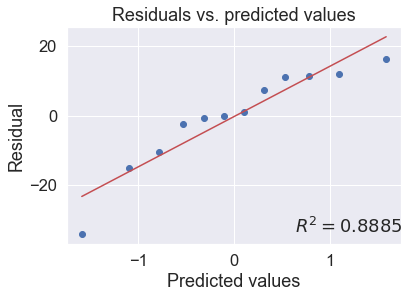

In [211]:
resid_qq(y_test3,pred_RF_GS)
sns.set(font_scale=1.5)

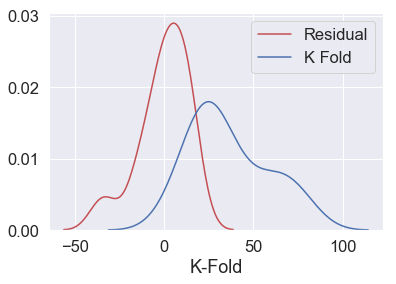

In [212]:
resids = np.subtract(y_test3, pred_RF_GS)
G = list(zip(pred_RF_GS.round(),resids))
DaF = pd.DataFrame(G, columns=['K-Fold','Residual'])

ax1 = sns.distplot(DaF['Residual'], hist=False, color="r", label="Residual")
sns.distplot(DaF['K-Fold'], hist=False, color="b", label="K Fold" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)
sns.set(font_scale=1.5)

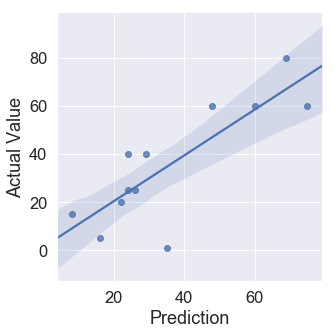

In [213]:
z = list(zip(pred_RF_GS.round(),y_test3))
dff = pd.DataFrame(z, columns=['Prediction','Actual Value'])
#z = list(zip(predictions,y_pred,y_test2))
#dff = pd.DataFrame(z, columns=['Prediction','Ran_For_pred' ,'Y_test'])
#dff
sns.lmplot(x = 'Prediction',y='Actual Value',data=dff)
sns.set(font_scale=1.5)

Text(0.5, 1.0, 'Actual vs Predicted Values')

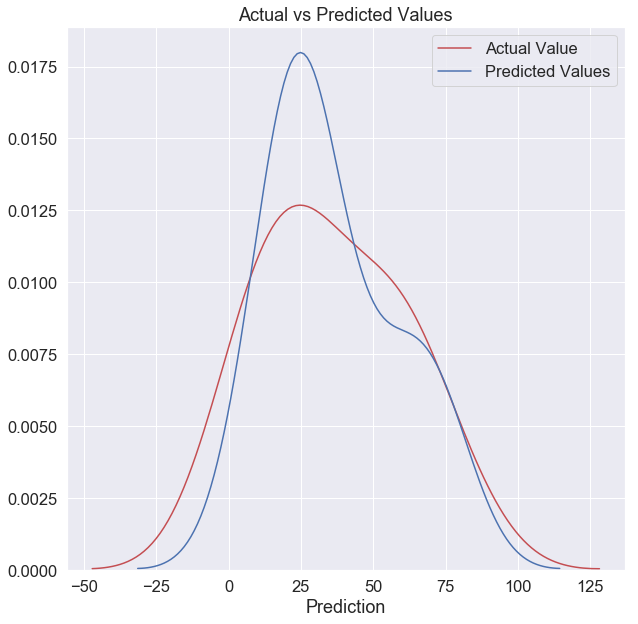

In [214]:
plt.figure(figsize=(10, 10))


ax1 = sns.distplot(dff['Actual Value'], hist=False, color="r", label="Actual Value")
sns.distplot(dff['Prediction'], hist=False, color="b", label="Predicted Values" , ax=ax1)
#sns.distplot(dff['Ran_For_pred'], hist=False, color="g", label="Random Forest Predicted Values" , ax=ax1)

sns.set(font_scale=1.5)
plt.title('Actual vs Predicted Values')

In [215]:
print_metrics(y_test3,pred_RF_GS,5)

Mean Square Error      = 185.6475
Root Mean Square Error = 13.62525229124217
Mean Absolute Error    = 10.141666666666667
Median Absolute Error  = 10.75
R^2                    = 0.673391406335903
Adjusted R^2           = 0.48675792424213327
SSE                    = 2227.77
SST                    = 6820.916666666667
SSR                    = 5192.303333333333
r_square               = 0.673391406335903
AIC                    = 72.68619657199096
BIC                    = 75.11072982093097


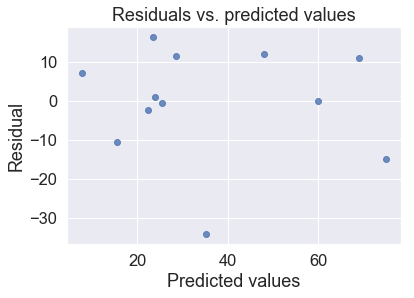

In [216]:
resid_plot(y_test3, pred_RF_GS) 

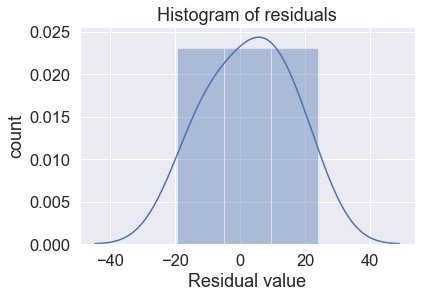

In [205]:
hist_resids(y_test3, pred_RF_GS) 

## Nested Cross-Validation

In [ ]:
params_RF = {"max_depth": [3,5,6,7,8,9],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3,5,7],
              "min_samples_leaf": [1, 3,5,6]}
 
model_RF_GS = GridSearchCV(RandomForestRegressor(), param_grid=params_RF,cv=5)
model_RF_GS.fit(R,K)

In [ ]:
nested_RF_score = cross_val_score(model_RF_GS, X=R, y=K, cv=5)

In [ ]:
nested_RF_score

In [ ]:
print("RSquare: %0.2f (+/- %0.2f)" % (nested_RF_score.mean(), nested_RF_score.std() * 2))

We get a 49% accuracy when we use Nested K-Fold Cross-Validation.

In [ ]:
'''
for x in X.columns:
    plt.figure()
    sns.distplot(np.log(df[x]))
    plt.title(x)'''

In [ ]:
df2 = pd.read_csv('dataFrame_25.csv', index_col=0)

In [ ]:
X2 = df2[['roi1_mean','roi1_std','roi1_median','roi2_mean','roi2_std']]
y2 = df2['concentration']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=0)

In [ ]:
lm = LinearRegression(fit_intercept=False)

In [ ]:
lm.fit(X2_train,y2_train)

In [ ]:
predictions2 = lm.predict(X2_test)

In [ ]:
sklm.r2_score(y2_test,predictions2)

In [ ]:
print_metrics(y2_test, predictions2, 6)

In [ ]:
hist_resids(y2_test, predictions2) 

In [ ]:
resid_qq(y2_test,predictions2)

In [ ]:
numCols = ['roi1_mean', 'roi1_std','roi1_median' ,'roi2_mean', 'roi2_std','roi1_median', 'img_ratio']

In [ ]:
for col in numCols:
    plt.figure()
    sns.distplot(df[col])
    #plt.scatter(df2['concentration'], df2[col])
    #plt.xlabel('Concentration')
    #plt.ylabel(col)
    plt.title(col)

In [ ]:
for x in df.columns[1:-1]:
    f, [ax1,ax2,ax3] = plt.subplots(1,3)
    sns.distplot(df[x],ax=ax1)
    sns.distplot(np.sqrt(df[x]), ax=ax2)
    sns.distplot(np.log(df[x]), ax=ax3)
    ax1.set_title(x)
    ax2.set_title('Square root of '+x)
    ax3.set_title('Log of '+x)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(-10,10,100)

In [4]:
def sig(z):
    s = 1/(1+np.exp(-z))
    
    return s

Text(0, 0.5, 'S(x)')

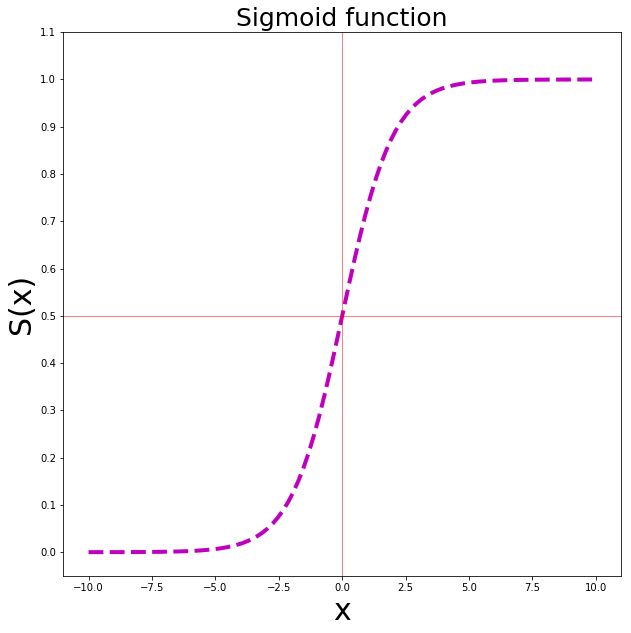

In [5]:
plt.figure(figsize=(10,10))
plt.plot(x,sig(x),'k--',c='m',linewidth=4)
plt.yticks(np.arange(0, 1.2, step=0.1))
plt.axhline(0.5,0,10,linewidth=.5, color='r')
plt.axvline(0,0,10,linewidth=.5, color='r')
plt.title('Sigmoid function', fontsize=25)
plt.xlabel('x', fontsize=30)
plt.ylabel('S(x)', fontsize=30)

In [ ]:
def poly(b,b1,b2,x):
    y= b+b1*x+b2*x**2
    
    return y